<a href="https://colab.research.google.com/github/ashugk/365datadcience/blob/main/6_4CliusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv('Country_clusters.csv')
data.head(5)

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


Map the data

In [17]:
data_mapped=data.copy()
data_mapped['Language']= data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


Selecting the feature

In [18]:
x= data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


Clustering

In [19]:
kmeans= KMeans(3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Clustering result

In [21]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 1, 1, 2], dtype=int32)

In [22]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster']= identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


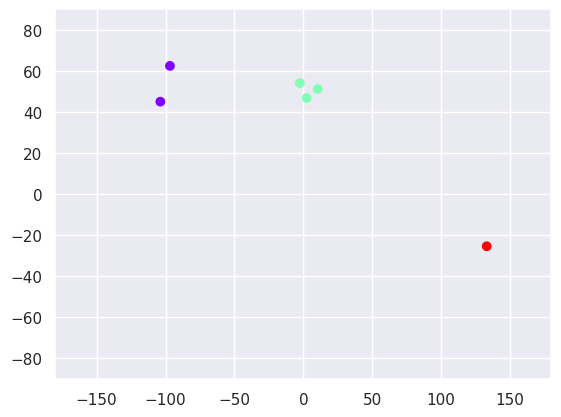

In [23]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Selecting with no of clusters

WCSS(within-cluster sum of squares)

In [24]:
kmeans.inertia_

290.10523333333333

In [25]:
wcss=[]

for i in range(1,7):
  kmeans= KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'within-cluster sum of squares')

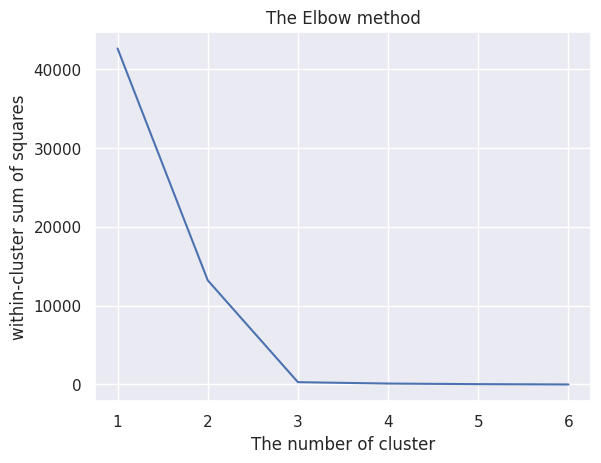

In [27]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow method')
plt.xlabel('The number of cluster')
plt.ylabel('within-cluster sum of squares')
